# Mini Project: Trees and Forests

In this mini-project you'll be introduced to some fundamental concepts in machine learning: **Decision Trees**, **Random Forests**, **Boosting**, and **Bagging**. These techniques play a crucial role in building powerful and versatile machine learning models that can be applied to a wide range of tasks, from classification to regression.

## Decision Trees

Decision Trees are intuitive models that mimic human decision-making processes. Just like answering a series of questions to reach a conclusion, decision trees segment data based on a sequence of if-else questions. They partition the feature space into regions and assign a label to each region. Decision trees are particularly helpful in understanding the decision-making process behind predictions.

## Random Forests

Random Forests are an ensemble method that combines multiple decision trees to create a more robust and accurate model. Each tree in a random forest is trained on a random subset of the data with replacement (bootstrapping), and these trees are allowed to make individual predictions. The final prediction is determined through majority voting (classification) or averaging (regression) of the predictions made by the individual trees. Random Forests are known for their ability to handle noisy data, reduce overfitting, and capture complex relationships.

## Bagging: Bootstrap Aggregating

Bagging, short for Bootstrap Aggregating, is the technique behind Random Forests. It involves training multiple models on bootstrapped subsets of the training data. Bagging reduces the variance of the model by averaging out the noise and errors present in individual models. While Random Forests are a specific application of bagging to decision trees, bagging can also be applied to other base models.

## Boosting

Boosting is another ensemble technique that focuses on building a strong predictor by sequentially training multiple weak learners (often shallow decision trees). Boosting assigns weights to training instances, focusing more on those that the previous models misclassified. This iterative process helps the model correct its mistakes and improve its performance over time. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

In this mini-project, we will:

1. Implement and visualize decision trees using the scikit-learn library.
2. Explore the power of random forests and understand feature importance.
3. Dive into the boosting technique with AdaBoost to enhance model accuracy.

For this mini-project we'll be using the [Breast Cancer Wisconsin (Diagnostic) dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). First, let's import all the libraries we'll be using.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

Here are your tasks:

1. Use [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) to load the Breast Cancer Wisconsin dataset as a Pandas dataframe.
2. Split the dataset into training and test sets.
3. Display the first five rows of data and make sure everything looks ok. You should have already explored the data a bit in the logistic regression mini-project so there's no need to conduct further EDA.  

In [2]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
# Split the dataset into training and testing sets

X = df.drop('target', axis='columns')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1337)

In [4]:
# Display first 5 rows
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Let's start by diving into decision trees. At a high level, decision trees are a machine learning algorithm used for both classification and regression tasks. They model decisions and decision-making processes by breaking down a complex decision into a sequence of simpler decisions or questions. Each decision leads to one of several possible outcomes, eventually leading to a prediction or classification.

**Decision trees are built out of the following components:**
- **Nodes:** Decision trees consist of nodes. The initial node is the root node, and the final nodes are called leaf nodes.
- **Edges:** Edges connect nodes and represent the decision outcomes.
- **Attributes/Features:** Each node involves a decision based on a specific attribute or feature.
- **Splitting:** At each node, the dataset is partitioned into subsets based on an attribute's values.
- **Leaf Nodes:** These nodes represent the final predicted class or value.

**How Decision Trees Work:**
1. **Selecting the Best Feature:** Decision trees start with the root node and select the feature that best separates the data.
2. **Splitting:** The selected feature is used to split the data into subsets at each internal node.
3. **Repeating:** The process continues recursively for each subset, selecting the best feature at each node.
4. **Leaf Nodes:** The process stops when a certain stopping criterion is met, or when all instances at a node belong to the same class.

**Advantages:**
1. **Interpretability:** Decision trees are easy to understand and interpret. The path from the root to a leaf node can be visualized as a sequence of decisions.
2. **Handles Numerical and Categorical Data:** Decision trees can handle both numerical and categorical data, making them versatile.
3. **Non-Linearity:** They can capture non-linear relationships between features and the target variable.
4. **Feature Importance:** Decision trees provide a measure of feature importance, helping in feature selection.

**Challenges and Considerations:**
1. **Overfitting:** Decision trees can create overly complex models that fit the training data too closely, leading to poor generalization.
2. **Instability:** Small changes in the data can lead to different trees, which can make the model unstable.
3. **Bias towards Majority Class:** In classification tasks, decision trees tend to favor the majority class if classes are imbalanced.

**Improvements:**
1. **Pruning:** Pruning is the process of removing branches that do not improve the model's performance on validation data, reducing overfitting.
2. **Ensemble Methods:** Random Forests and Gradient Boosting Trees are ensemble methods that combine multiple decision trees to improve performance.

There are a number of different metrics used to determine how to split a node in a decision tree. The Gini impurity is a popular criterion used in decision tree algorithms. It measures the degree of impurity in a dataset, where lower values indicate more pure subsets of data. In the context of decision trees, the Gini impurity is used to assess how often a randomly chosen element would be misclassified if it were randomly assigned to a class based on the distribution of class labels in a subset. The Gini impurity ranges between 0 (pure node, all instances belong to a single class) and 0.5 (impure node, instances are evenly distributed across classes).

## Decision Trees

Here are your tasks:

1. Use Scikit-Learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to fit a model on the training data.
2. Visualize the resulting tree using [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).
3. Iterate on the first two steps by trying different inputs to the decision tree classifier. What happens if you change the max depth? How about the maximum number of leaf nodes? From the visualization, make sure you're able to understand how to descend the decision tree to arrive at a prediction.

A base Decision Tree will be created that uses all of the default parameter values.

Then, a model will be created to adjust one of the following parameters at a time:
* max_depth
* max_leaf_nodes
* class_weight
* criterion

###First Decision Tree -- No Parameter Tuning



In [5]:
# train model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.8947368421052632

In [6]:
# view mean cross val score of 5 trained models
from sklearn.model_selection import cross_val_score

dtc_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=5)
dtc_scores.mean()

0.9173420276354604

In [7]:
# view depth and number of leaf nodes for current model
print(f'depth = {dtc.get_depth()}')
print(f'leaf nodes = {dtc.get_n_leaves()}')

depth = 8
leaf nodes = 21


*Visualize the Tree*

[Text(0.6372549019607843, 0.9444444444444444, 'worst perimeter <= 105.95\ngini = 0.468\nsamples = 455\nvalue = [170, 285]\nclass = benign'),
 Text(0.47058823529411764, 0.8333333333333334, 'worst concave points <= 0.159\ngini = 0.095\nsamples = 279\nvalue = [14, 265]\nclass = benign'),
 Text(0.37254901960784315, 0.7222222222222222, 'worst smoothness <= 0.178\ngini = 0.05\nsamples = 271\nvalue = [7, 264]\nclass = benign'),
 Text(0.29411764705882354, 0.6111111111111112, 'perimeter error <= 6.597\ngini = 0.037\nsamples = 268\nvalue = [5, 263]\nclass = benign'),
 Text(0.2549019607843137, 0.5, 'worst radius <= 15.78\ngini = 0.03\nsamples = 267\nvalue = [4, 263]\nclass = benign'),
 Text(0.1568627450980392, 0.3888888888888889, 'area error <= 47.035\ngini = 0.016\nsamples = 254\nvalue = [2, 252]\nclass = benign'),
 Text(0.0784313725490196, 0.2777777777777778, 'worst texture <= 33.35\ngini = 0.008\nsamples = 250\nvalue = [1, 249]\nclass = benign'),
 Text(0.0392156862745098, 0.16666666666666666, 

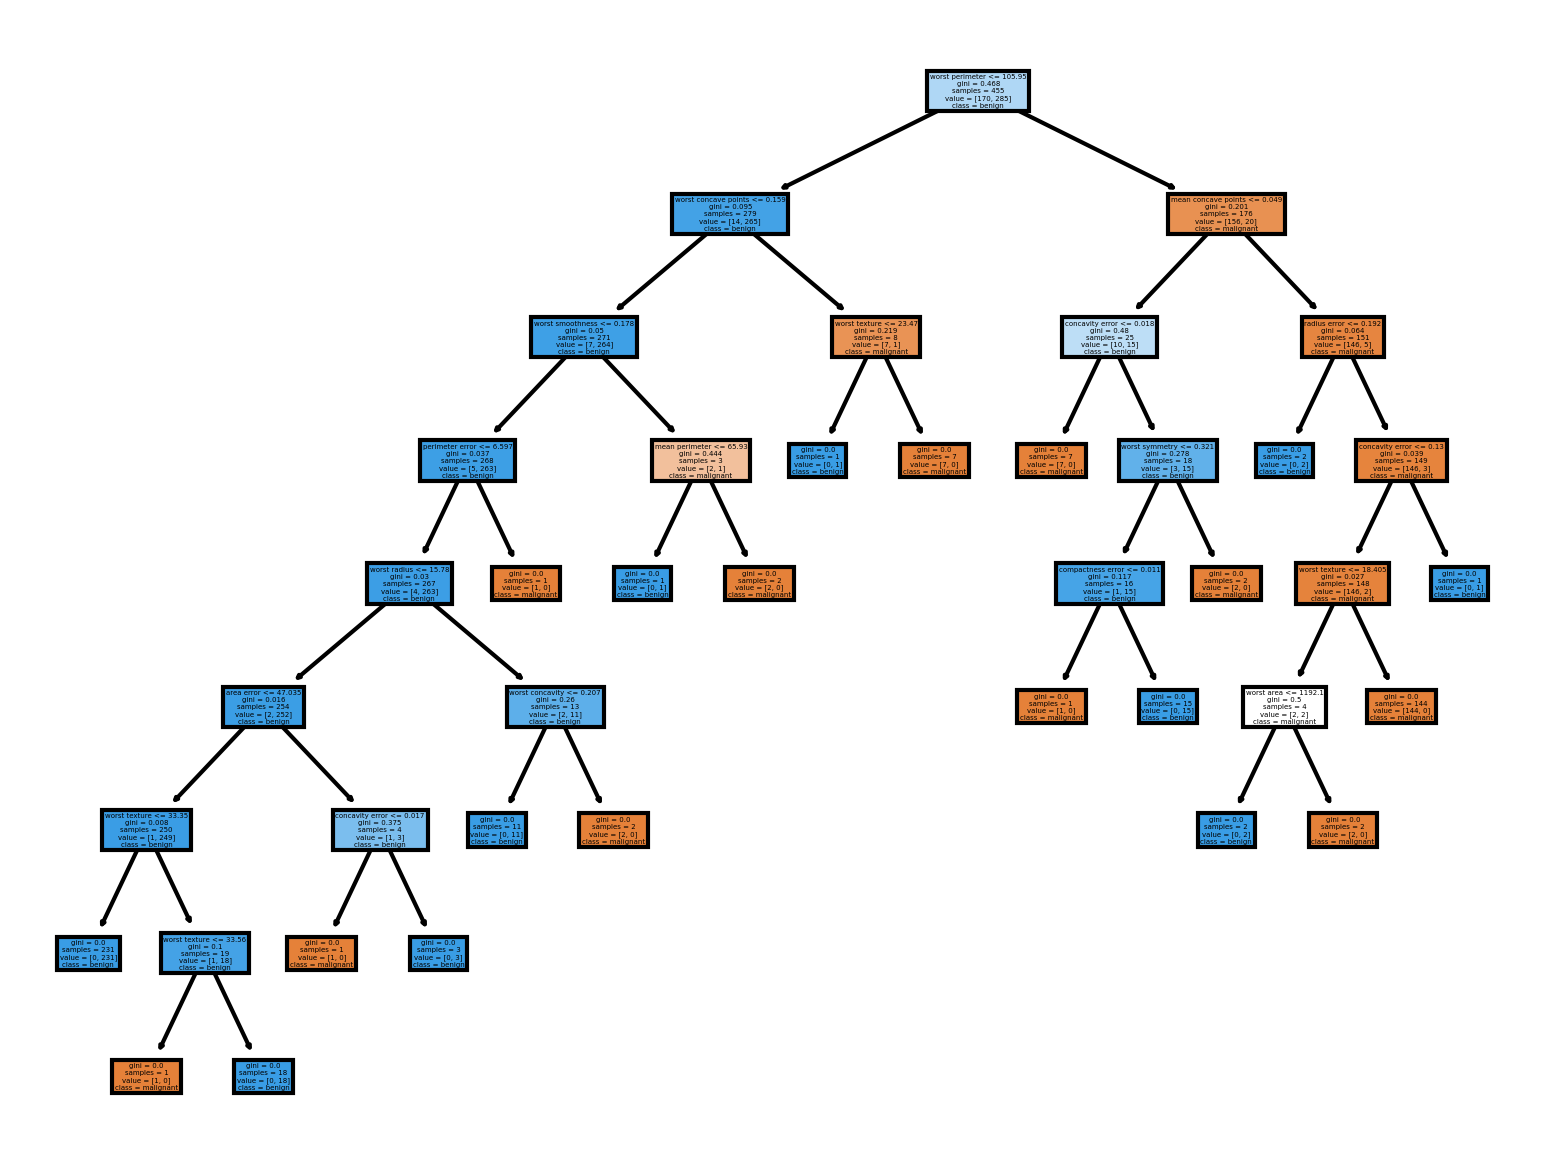

In [8]:
# set size for tree plot
fig, axes = plt.subplots(dpi = 300)

# create variables for feature names and target names
fn = data.feature_names
tn = data.target_names

# add feature names and target names to tree visualization
plot_tree(dtc,
          feature_names = fn,
          class_names = tn,
          filled = True)

###Second Decision Tree - Test max_depth

The base decision tree with no parameter tuning produced a tree depth of eight. Let's test the accuracy of various max tree depths between 1 and 12 to see how the accuracy scores compare.

In [89]:
# Test for max depth between 1 and 12
start = 1
max_depth_range = list(range(start, 13))

# store model scores for each depth tested
accuracy = []

for depth in max_depth_range:
  dtc_test = DecisionTreeClassifier(max_depth = depth,
                                  random_state = 42)
  dtc_test.fit(X_train, y_train)

  score = dtc_test.score(X_test, y_test)
  accuracy.append(score)

# print accuracy scores per depth of decision tree
num = start

for score in accuracy:
  print(f'depth of {num}: {score}')
  num += 1

depth of 1: 0.8947368421052632
depth of 2: 0.9298245614035088
depth of 3: 0.8947368421052632
depth of 4: 0.9035087719298246
depth of 5: 0.9122807017543859
depth of 6: 0.8947368421052632
depth of 7: 0.8859649122807017
depth of 8: 0.8947368421052632
depth of 9: 0.8947368421052632
depth of 10: 0.8947368421052632
depth of 11: 0.8947368421052632
depth of 12: 0.8947368421052632


Max depth of 8 appears to be the least complex tree that has a stable accuracy score. The base model is set at the most efficient tree depth.

However, let's view what happens if we change the max depth to a number lower and higher than the optimum depth level. Testing models with a max depth of 5 and 12.

**max_depth set to 5**

In [9]:
# train model
dtc2 = DecisionTreeClassifier(max_depth = 5,
                                random_state = 42)
dtc2.fit(X_train, y_train)
dtc2.score(X_test, y_test)

0.9122807017543859

In [10]:
# view mean cross val score of 5 trained models
dtc_scores2 = cross_val_score(DecisionTreeClassifier(max_depth = 5, random_state=42), X, y, cv=5)
dtc_scores2.mean()

0.91914299021891

In [11]:
# view depth and number of leaf nodes for current model
print(f'depth = {dtc2.get_depth()}')
print(f'leaf nodes = {dtc2.get_n_leaves()}')

depth = 5
leaf nodes = 15


*Visualize the Tree*

[Text(0.5595238095238095, 0.9166666666666666, 'worst perimeter <= 105.95\ngini = 0.468\nsamples = 455\nvalue = [170, 285]\nclass = benign'),
 Text(0.35714285714285715, 0.75, 'worst concave points <= 0.159\ngini = 0.095\nsamples = 279\nvalue = [14, 265]\nclass = benign'),
 Text(0.23809523809523808, 0.5833333333333334, 'worst smoothness <= 0.178\ngini = 0.05\nsamples = 271\nvalue = [7, 264]\nclass = benign'),
 Text(0.14285714285714285, 0.4166666666666667, 'perimeter error <= 6.597\ngini = 0.037\nsamples = 268\nvalue = [5, 263]\nclass = benign'),
 Text(0.09523809523809523, 0.25, 'worst radius <= 15.78\ngini = 0.03\nsamples = 267\nvalue = [4, 263]\nclass = benign'),
 Text(0.047619047619047616, 0.08333333333333333, 'gini = 0.016\nsamples = 254\nvalue = [2, 252]\nclass = benign'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]\nclass = benign'),
 Text(0.19047619047619047, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = malignant'),
 Text(0

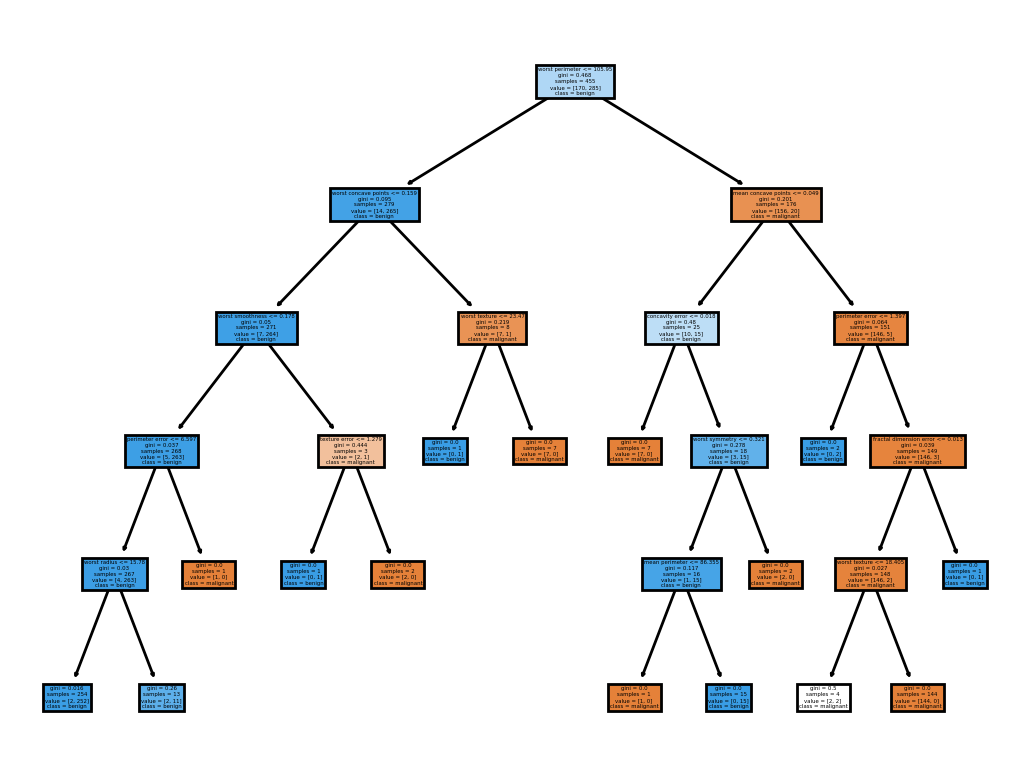

In [12]:
# plot the tree
fig, axes = plt.subplots(dpi = 200)

plot_tree(dtc2,
          feature_names = fn,
          class_names = tn,
          filled = True)

**max_depth set to 12**

In [13]:
# train model
dtc3 = DecisionTreeClassifier(max_depth = 12,
                                random_state = 42)
dtc3.fit(X_train, y_train)
dtc3.score(X_test, y_test)

0.8947368421052632

In [14]:
# view cross val score of 5 trained models
dtc_scores3 = cross_val_score(DecisionTreeClassifier(max_depth = 12, random_state=42), X, y, cv=5)
dtc_scores3.mean()

0.9173420276354604

In [15]:
# view depth and number of leaf nodes for current model
print(f'depth = {dtc3.get_depth()}')
print(f'leaf nodes = {dtc3.get_n_leaves()}')

depth = 8
leaf nodes = 21


*Visualize the Tree*

[Text(0.6372549019607843, 0.9444444444444444, 'worst perimeter <= 105.95\ngini = 0.468\nsamples = 455\nvalue = [170, 285]\nclass = benign'),
 Text(0.47058823529411764, 0.8333333333333334, 'worst concave points <= 0.159\ngini = 0.095\nsamples = 279\nvalue = [14, 265]\nclass = benign'),
 Text(0.37254901960784315, 0.7222222222222222, 'worst smoothness <= 0.178\ngini = 0.05\nsamples = 271\nvalue = [7, 264]\nclass = benign'),
 Text(0.29411764705882354, 0.6111111111111112, 'perimeter error <= 6.597\ngini = 0.037\nsamples = 268\nvalue = [5, 263]\nclass = benign'),
 Text(0.2549019607843137, 0.5, 'worst radius <= 15.78\ngini = 0.03\nsamples = 267\nvalue = [4, 263]\nclass = benign'),
 Text(0.1568627450980392, 0.3888888888888889, 'area error <= 47.035\ngini = 0.016\nsamples = 254\nvalue = [2, 252]\nclass = benign'),
 Text(0.0784313725490196, 0.2777777777777778, 'worst texture <= 33.35\ngini = 0.008\nsamples = 250\nvalue = [1, 249]\nclass = benign'),
 Text(0.0392156862745098, 0.16666666666666666, 

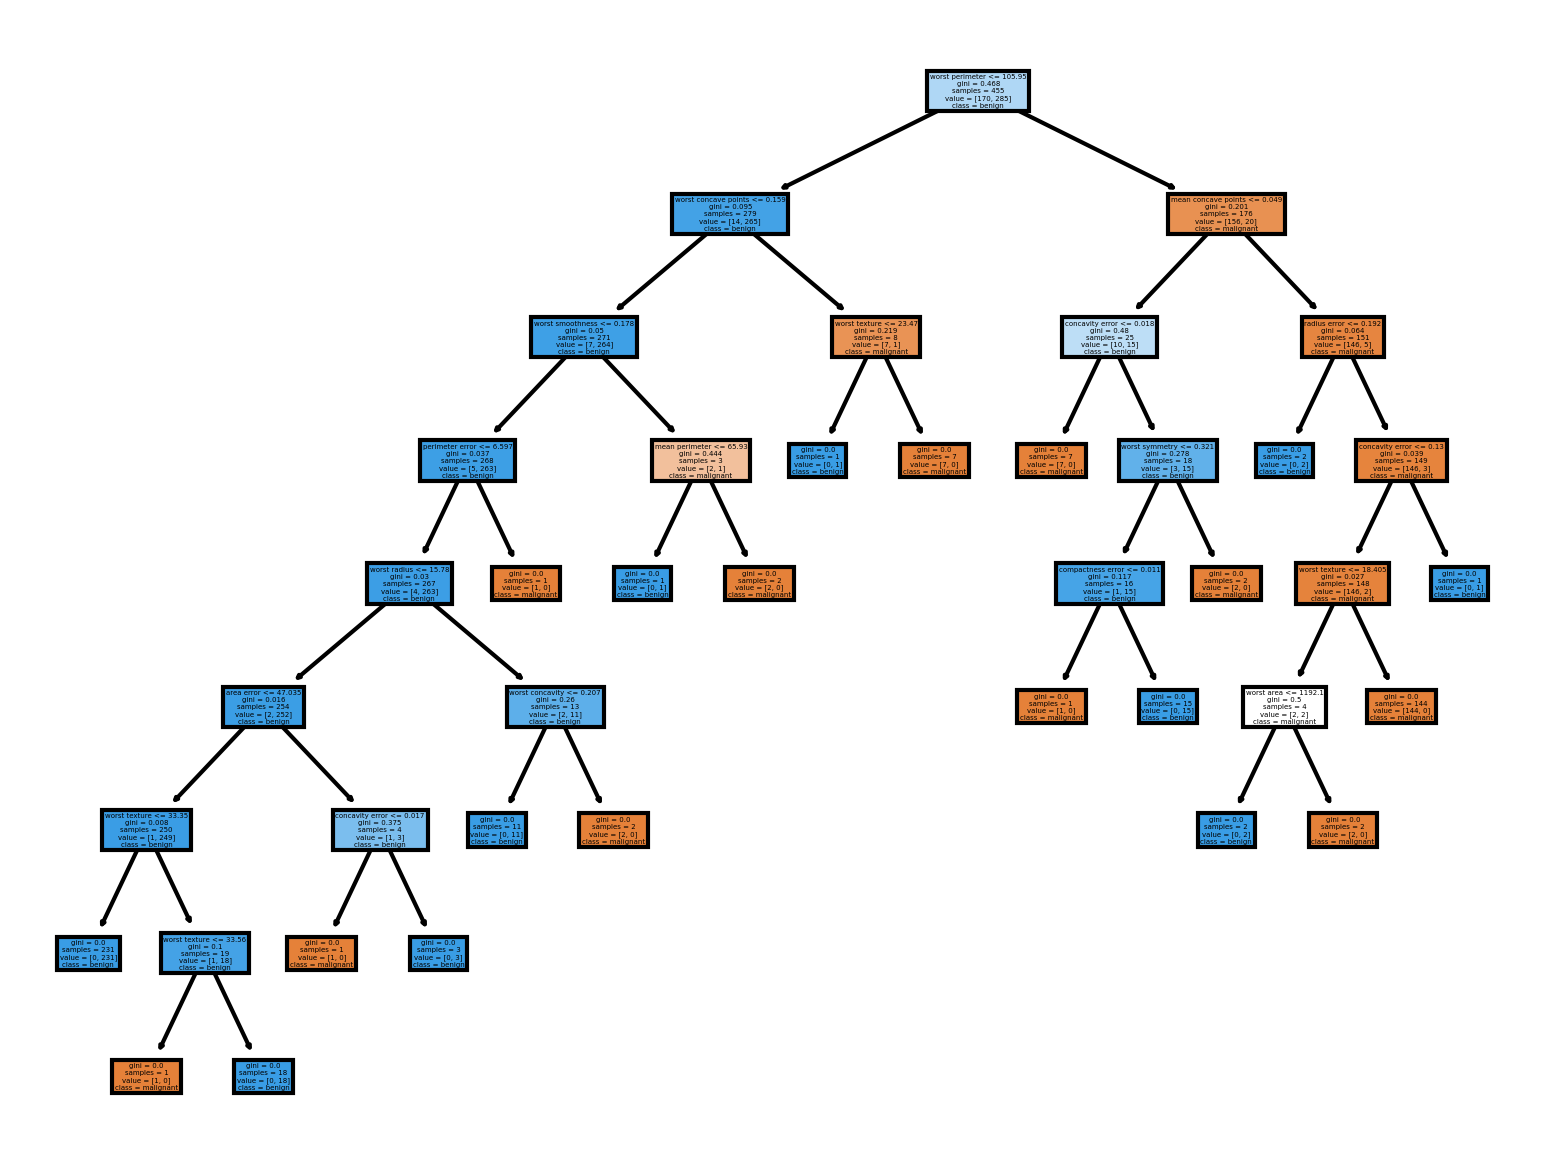

In [16]:
# plot the tree
fig, axes = plt.subplots(dpi = 300)

plot_tree(dtc3,
          feature_names = fn,
          class_names = tn,
          filled = True)

**Results using max_depth**


***max_depth lower than base model depth***


By setting the max_depth to a smaller value than the base model's depth, the resulting tree had fewer leaf nodes and a less complex structure. Model `dtc2` set the max_depth to 5, and the resulting tree went to a depth of 5 on both the left half and right half of the tree. (The base decision tree went to a depth of 8 on the left half of the model but only to a depth of 6 on the right half.)

However, inputting a smaller max_depth number than the most efficient depth for the model caused the resulting tree to make useless splits. The `dtc2` tree split one benign node into two benign leaf nodes and one malignant node into two malignant leaf nodes. These splits were unnecessary since each leaf node matched the parent node classification.

***max_depth greater than base model depth***

Setting the max_depth to a value larger than the automatically calculated depth caused no effects to the resulting model. With the `dtc3` model, max_depth was set to 12 -- 50% higher than the base model's depth of eight. The `dtc3` tree was exactly the same as the base model.

***benefits of max_depth adjustment***

Changing the max_depth can make the resulting tree less complex and more accurate. However, the base Decision Tree for this dataset appeared to choose the most efficient max_depth of trees. The model accuracy scores did not improve significantly when the max depth was reduced.

Although this dataset did not require max_depth to be adjusted, the dataset is quite small with only 569 samples. Larger datasets may benefit from adjusting the max_depth parameter to reduce tree complexity.

###Third Decision Tree - Test Max Leaf Nodes

The base decision tree (with no parameter tuning) produced a tree with 21 leaf nodes. Let's view how the accuracy and tree models change if you set the max leaf nodes to be both above and below the base number. Will test models using a max leaf node of 15 and 25.

**max_leaf_nodes set to 15**

In [17]:
# train model
dtc4 = DecisionTreeClassifier(max_leaf_nodes = 15,
                                random_state = 42)
dtc4.fit(X_train, y_train)
dtc4.score(X_test, y_test)

0.9122807017543859

In [18]:
# view mean cross val score of 5 trained models
dtc_scores4 = cross_val_score(DecisionTreeClassifier(max_leaf_nodes = 15, random_state=42), X, y, cv=5)
dtc_scores4.mean()

0.9243906225741345

In [19]:
# view depth and number of leaf nodes for current model
print(f'depth = {dtc4.get_depth()}')
print(f'leaf nodes = {dtc4.get_n_leaves()}')

depth = 6
leaf nodes = 15


*Visualize the Tree*

[Text(0.5375, 0.9285714285714286, 'worst perimeter <= 105.95\ngini = 0.468\nsamples = 455\nvalue = [170, 285]\nclass = benign'),
 Text(0.325, 0.7857142857142857, 'worst concave points <= 0.159\ngini = 0.095\nsamples = 279\nvalue = [14, 265]\nclass = benign'),
 Text(0.2, 0.6428571428571429, 'worst smoothness <= 0.178\ngini = 0.05\nsamples = 271\nvalue = [7, 264]\nclass = benign'),
 Text(0.1, 0.5, 'symmetry error <= 0.009\ngini = 0.037\nsamples = 268\nvalue = [5, 263]\nclass = benign'),
 Text(0.05, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = malignant'),
 Text(0.15, 0.35714285714285715, 'gini = 0.03\nsamples = 267\nvalue = [4, 263]\nclass = benign'),
 Text(0.3, 0.5, 'mean radius <= 10.122\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = malignant'),
 Text(0.25, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = benign'),
 Text(0.35, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = malignant'),
 Text(0.45, 0.642857142

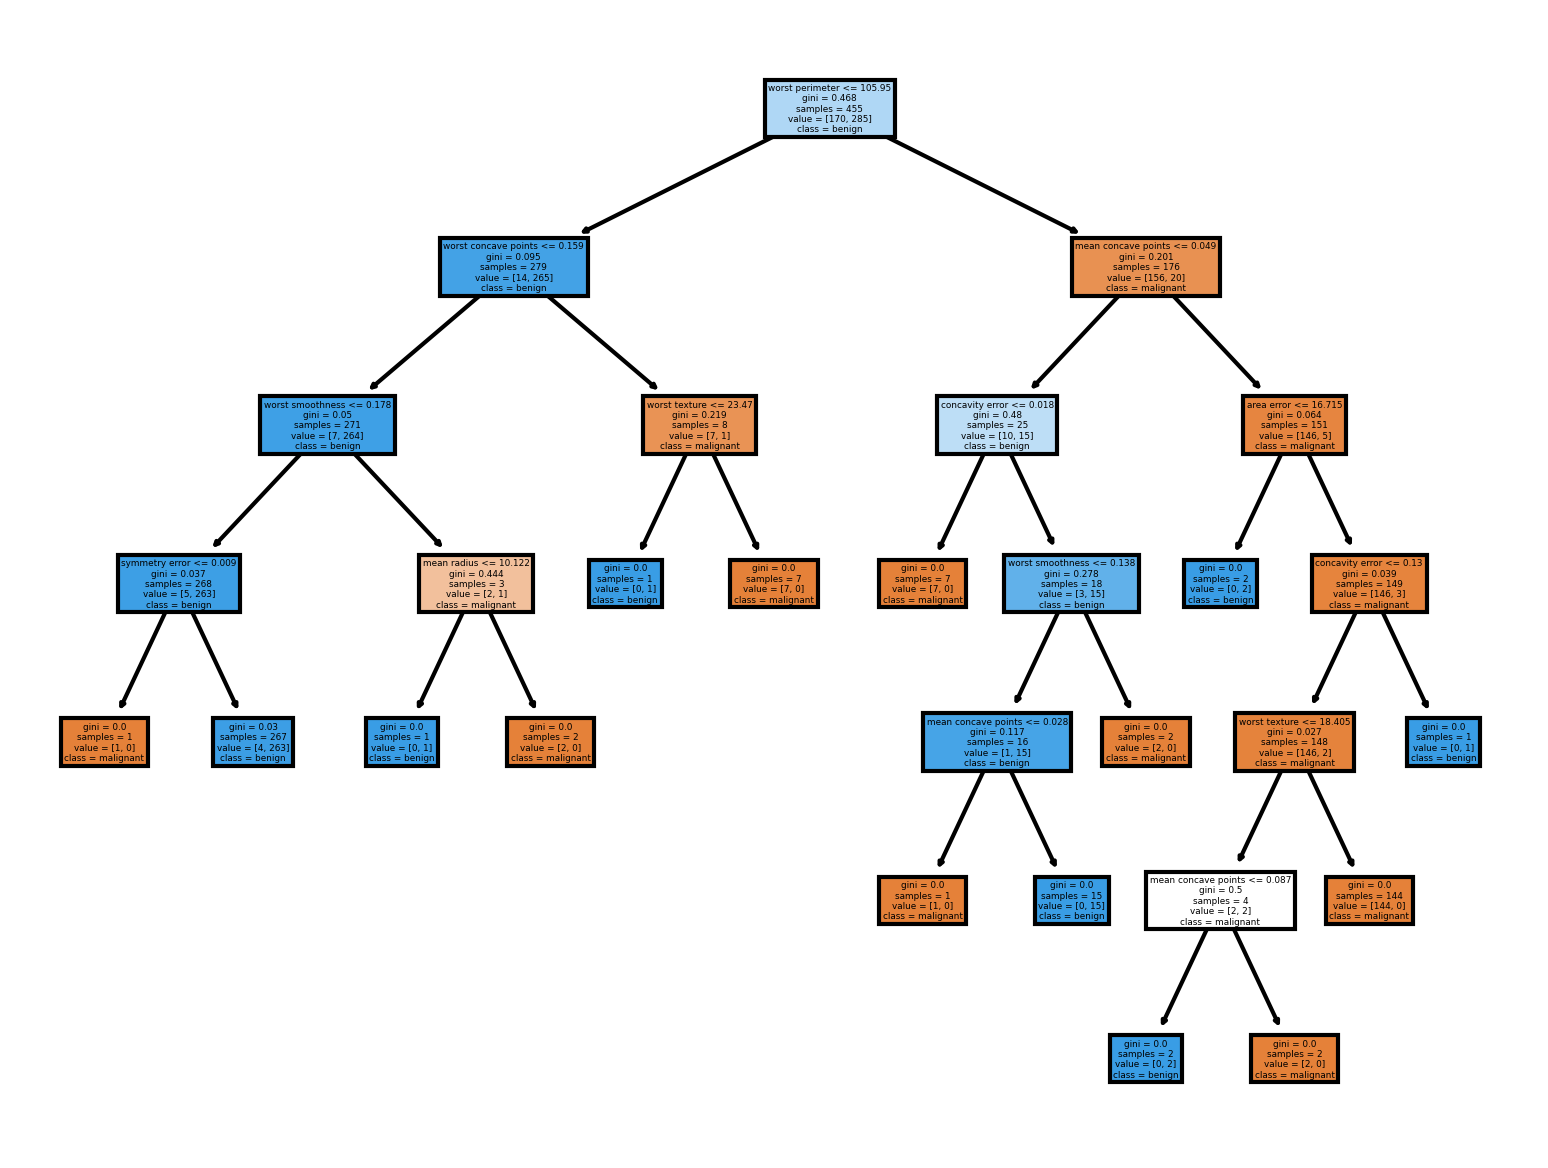

In [20]:
fig, axes = plt.subplots(dpi = 300)

# add feature names and target names to tree visualization
plot_tree(dtc4,
          feature_names = fn,
          class_names = tn,
          filled = True)

**max_leaf_nodes set to 25**

In [21]:
# train model
dtc5 = DecisionTreeClassifier(max_leaf_nodes = 25,
                                random_state = 42)
dtc5.fit(X_train, y_train)
dtc5.score(X_test, y_test)

0.9122807017543859

In [22]:
# view mean cross val score of 5 trained models
dtc_scores5 = cross_val_score(DecisionTreeClassifier(max_leaf_nodes = 25, random_state=42), X, y, cv=5)
dtc_scores5.mean()

0.924375097034622

In [23]:
# view depth and number of leaf nodes for current model
print(f'depth = {dtc5.get_depth()}')
print(f'leaf nodes = {dtc5.get_n_leaves()}')

depth = 8
leaf nodes = 21


*Visualize the Tree*

[Text(0.6063829787234043, 0.9444444444444444, 'worst perimeter <= 105.95\ngini = 0.468\nsamples = 455\nvalue = [170, 285]\nclass = benign'),
 Text(0.425531914893617, 0.8333333333333334, 'worst concave points <= 0.159\ngini = 0.095\nsamples = 279\nvalue = [14, 265]\nclass = benign'),
 Text(0.3191489361702128, 0.7222222222222222, 'worst smoothness <= 0.178\ngini = 0.05\nsamples = 271\nvalue = [7, 264]\nclass = benign'),
 Text(0.23404255319148937, 0.6111111111111112, 'symmetry error <= 0.009\ngini = 0.037\nsamples = 268\nvalue = [5, 263]\nclass = benign'),
 Text(0.19148936170212766, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = malignant'),
 Text(0.2765957446808511, 0.5, 'worst radius <= 15.78\ngini = 0.03\nsamples = 267\nvalue = [4, 263]\nclass = benign'),
 Text(0.1702127659574468, 0.3888888888888889, 'area error <= 47.035\ngini = 0.016\nsamples = 254\nvalue = [2, 252]\nclass = benign'),
 Text(0.0851063829787234, 0.2777777777777778, 'worst texture <= 33.35\ngini = 0.008\nsamples

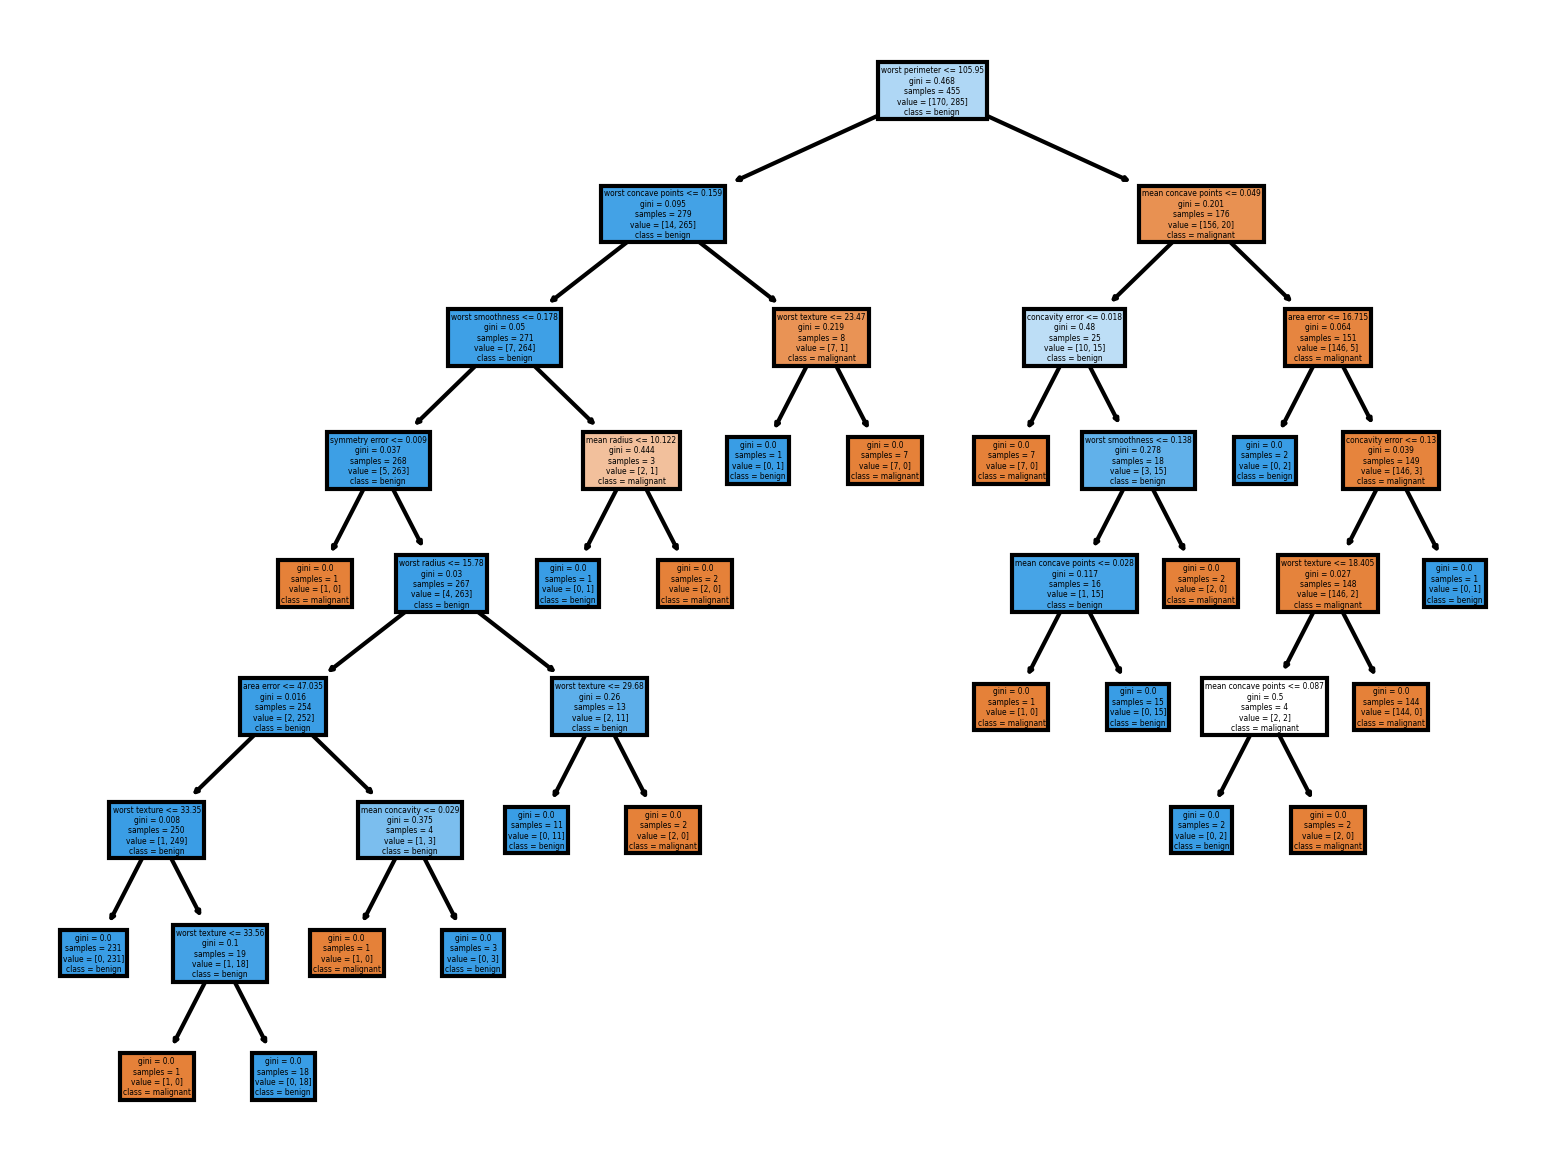

In [24]:
# plot the tree
fig, axes = plt.subplots(dpi = 300)

plot_tree(dtc5,
          feature_names = fn,
          class_names = tn,
          filled = True)

**Results using max_leaf nodes**



***max_leaf_nodes lower than base model***

The model `dtc4` set max_leaf_nodes to 15. By setting this parameter to a smaller number than the base model, the resulting tree had a reduced depth, reduced number of leaf nodes, and a slightly increased accuracy score. The structure of the tree also changed.

* base model:
  * max depth: 8
  * leaf nodes: 21
  * left half depth: 8
  * right half depth: 6
* model with max_leaf_nodes set to 15:
  * max depth: 6
  * leaf nodes: 15
  * left half depth: 4
  * right half depth: 6

Compared to the base Decision Tree, the tree depth of `dtc4`'s left side was cut in half while the right side of the tree remained at the same depth. This restructuring likely occurred because the base model's left side of the tree only separated out 4 malignant samples from the benign samples past the point where `dtc4` trimmed the left side's depth. By prioritizing the number of decisions made on the right side of the tree, more maligant and benign samples were separated from each other.

***adjusting max_leaf_nodes in general***

The model `dtc5` set the max_leaf_nodes to 25. Although the tree structure did not change between the base model and `dtc5`, the accuracy score of `dtc5` was slightly better than the base model's score.

* base model and `dtc5` tree structure:
  * max depth: 8
  * leaf nodes: 21
  * left half depth: 8
  * right half depth: 6

By comparing the two trees, the accuracy difference comes from the decisions made in `dtc4`'s decision tree path. At level 1, the right node splits into different subsets as compared to the base decision tree. Of note, both models that set a max_leaf_nodes value had this same change in decisions.

In the base model, if `worst perimeter` (root node) is greater than 105.95, the next step in the decision path is to look at the value of `mean concave points` (level 1). If that value is greater than 0.049, the next step is to look at `radius error` (level 2).

However, by setting the max_leaf_nodes to any value, the decision path changes. Instead of moving to `radius error` when `mean concave points` is greater than 0.049, the updated model's path points to `area error`.

***benefits of max_leaf_node adjustment***

Adjusting the max_leaf_nodes is another way to adjust the complexity of a decision tree. Choosing a small max_leaf_nodes value will reduce the number of nodes, or decisions made, in the tree and possibly create a shallower tree depth as well.

Also, simply by setting a max_leaf_nodes value, the logic of the decisions changes. This may or may not make the model more accurate.

In this testing scenario, the model was more accurate simply by adjusting the max_leaf_nodes, regardless of whether the leaf nodes were higher or lower than the base model's number of leaf nodes. However, since the dataset is small, the  increase in accuracy may simply indicate that the updated model is overfitting the data more than the base model.

###Fourth Decision Tree - Test class_weights

A base decision tree, with all parameters set to the defaults, produces a tree without considering that the y values are imbalanced. Let's view how the accuracy changes if we balance the target/class values using the class_weights parameter.

In [25]:

# print target values and how many samples per target value
print('TARGET VALUES:\tNUMBER OF SAMPLES:')
for index, value in df['target'].value_counts().sort_values().items():
  print(index, "=", data.target_names[index], f'\t{value}')

TARGET VALUES:	NUMBER OF SAMPLES:
0 = malignant 	212
1 = benign 	357


In [26]:
# train model
dtc6 = DecisionTreeClassifier(class_weight='balanced',
                                random_state = 42)
dtc6.fit(X_train, y_train)
dtc6.score(X_test, y_test)

0.9035087719298246

In [27]:
# view mean cross val score of 5 trained models
dtc_scores6 = cross_val_score(DecisionTreeClassifier(class_weight='balanced', random_state=42), X, y, cv=5)
dtc_scores6.mean()

0.9367179009470579

In [28]:
# view depth and number of leaf nodes for current model
print(f'depth = {dtc6.get_depth()}')
print(f'leaf nodes = {dtc6.get_n_leaves()}')

depth = 6
leaf nodes = 21


*Visualize the Tree*

[Text(0.5422794117647058, 0.9285714285714286, 'worst perimeter <= 105.15\ngini = 0.5\nsamples = 455\nvalue = [227.5, 227.5]\nclass = benign'),
 Text(0.35661764705882354, 0.7857142857142857, 'worst smoothness <= 0.178\ngini = 0.132\nsamples = 274\nvalue = [16.059, 209.14]\nclass = benign'),
 Text(0.27205882352941174, 0.6428571428571429, 'area error <= 47.035\ngini = 0.071\nsamples = 267\nvalue = [8.029, 208.342]\nclass = benign'),
 Text(0.19117647058823528, 0.5, 'worst radius <= 15.725\ngini = 0.049\nsamples = 262\nvalue = [5.353, 205.947]\nclass = benign'),
 Text(0.11764705882352941, 0.35714285714285715, 'worst texture <= 33.35\ngini = 0.013\nsamples = 249\nvalue = [1.338, 197.965]\nclass = benign'),
 Text(0.058823529411764705, 0.21428571428571427, 'texture error <= 0.437\ngini = 0.0\nsamples = 231\nvalue = [0.0, 184.395]\nclass = benign'),
 Text(0.029411764705882353, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0.0, 0.798]\nclass = benign'),
 Text(0.08823529411764706, 0.071

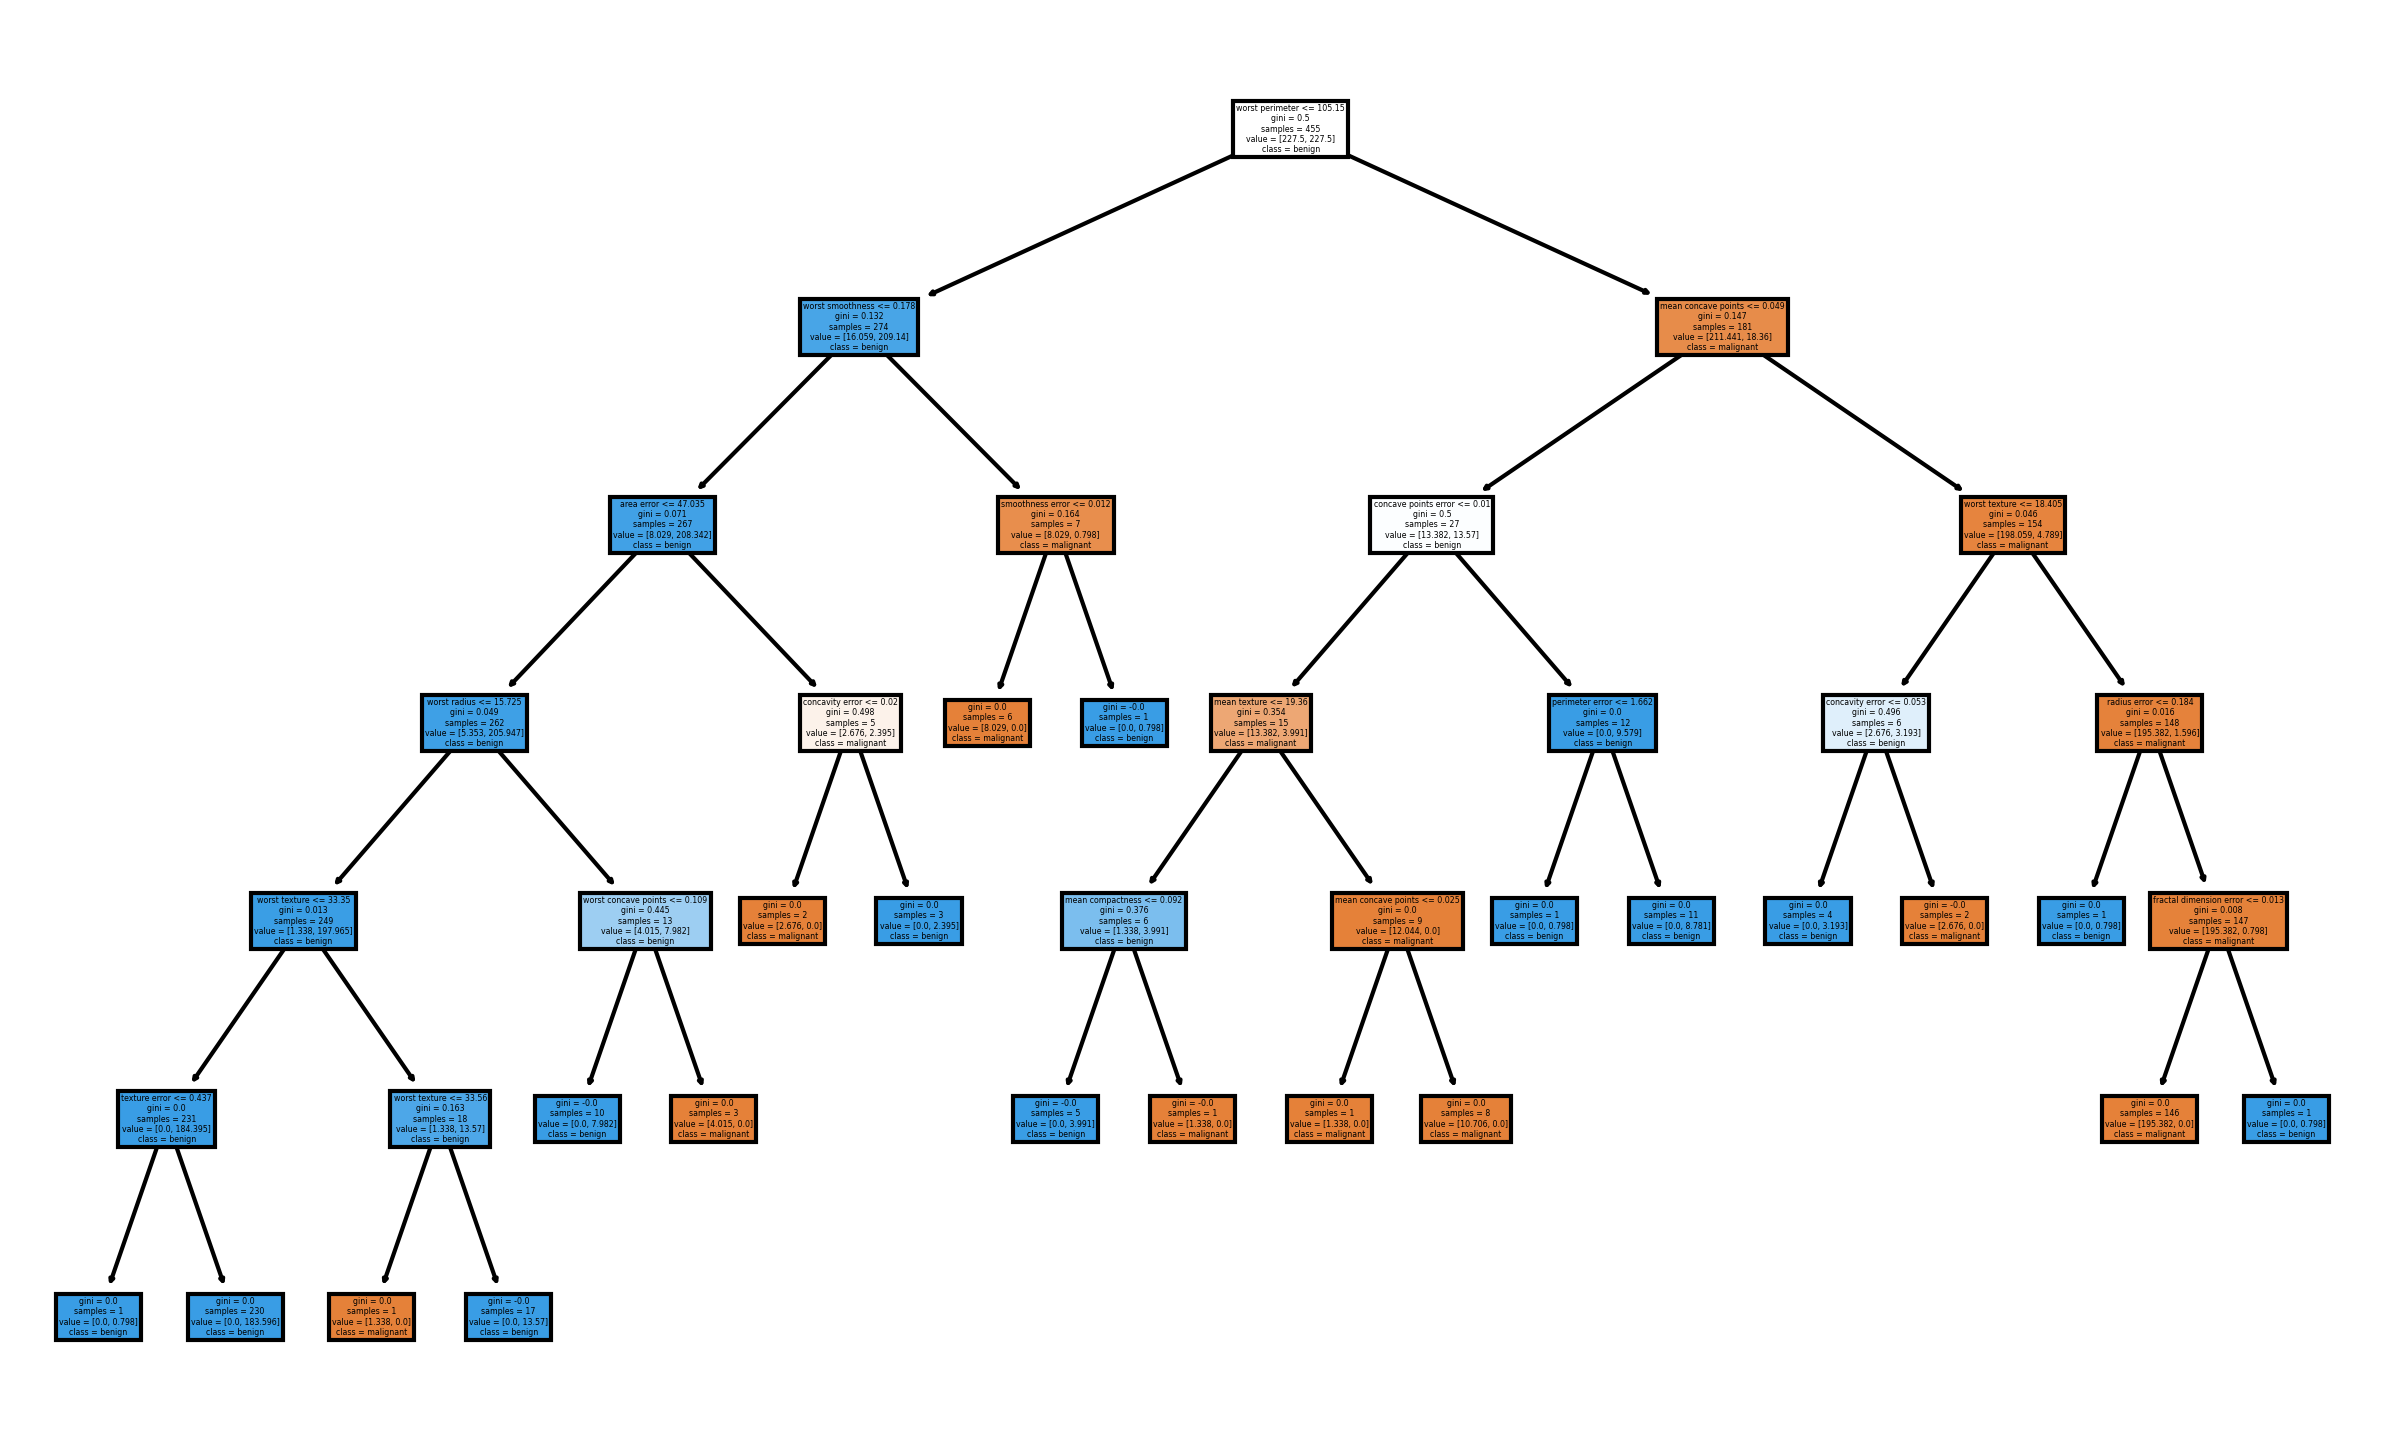

In [29]:
# plot tree
fig, axes = plt.subplots(figsize = (10,6), dpi = 300)

plot_tree(dtc6,
          feature_names = fn,
          class_names = tn,
          filled = True)

**Results using class_weight**




The `dtc6` model sets `class_weight` to equal `balanced`. This model's tree has a shorter depth than the base model, but still contains the same number of nodes. Having to make the same number of decisions in a model with fewer levels causes `dtc6` to be at least as complex as the base model.

The `dtc6` tree does create 3 irrelevant splits, however. Two different benign nodes were each split into two benign leaf nodes, while one malignant node was split into two malignant leaf nodes. Like the `dtc2` model that set max_depth to 5, having irrelevant decision nodes causes inefficiency in the model.

Although balancing the class weights in `dtc6`'s model increased the mean cross validation to make it the most accurate model tested so far, its single model accuracy score is the second lowest of all the models tested so far. Possible explanations for this variance include: (1) the imbalance in target features is small, (2) the tree built is inefficient and just as complex as the base Decision Tree.

***benefits of class_weight adjustment***

Adjusting the class weights helps to account for imbalances in a dataset's target values. Although datasets with a slight imbalance may not see a significant increase in accuracy score when balancing a model's class weights, it is useful to test this parameter on any imbalanced dataset to see if it will improve the model's accuracy.

### Fifth Decision Tree - Test criterion

The decision tree splits data into subtrees based on specified criterion. The default criterion in scikit-learn is `gini`, which is based on the Gini impurity score. Another criterion, called `entropy`, uses the Shannon information gain to split the data and incorporates logarithms into its calculations. This means the `entropy` criterion takes longer to run than the `gini` criterion.

In [30]:
# import time to calculate the time it takes to train and fit the model
import time

In [31]:
# train model and display time to execute
start_time = time.time()

dtc7 = DecisionTreeClassifier(criterion='entropy',
                              random_state = 42)
dtc7.fit(X_train, y_train)

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:",execution_time)

Execution time: 0.015507221221923828


In [32]:
# retrain base model to show time to execute
# train model and display time to execute
start_time = time.time()

dtc_test = DecisionTreeClassifier(random_state = 42)
dtc_test.fit(X_train, y_train)

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:",execution_time)

Execution time: 0.015801429748535156


In [33]:
# test model
dtc7.score(X_test, y_test)

0.9210526315789473

In [34]:
# view mean cross val score of 5 trained models
dtc_scores7 = cross_val_score(DecisionTreeClassifier(criterion='entropy', random_state=42), X, y, cv=5)
dtc_scores7.mean()

0.9367489520260829

In [35]:
# view depth and number of leaf nodes for current model
print(f'depth = {dtc7.get_depth()}')
print(f'leaf nodes = {dtc7.get_n_leaves()}')

depth = 7
leaf nodes = 18


*Visualize the Tree*

[Text(0.6363636363636364, 0.9375, 'worst perimeter <= 105.95\nentropy = 0.953\nsamples = 455\nvalue = [170, 285]\nclass = benign'),
 Text(0.36363636363636365, 0.8125, 'worst concave points <= 0.135\nentropy = 0.287\nsamples = 279\nvalue = [14, 265]\nclass = benign'),
 Text(0.18181818181818182, 0.6875, 'area error <= 47.035\nentropy = 0.115\nsamples = 259\nvalue = [4, 255]\nclass = benign'),
 Text(0.09090909090909091, 0.5625, 'worst texture <= 30.145\nentropy = 0.066\nsamples = 255\nvalue = [2, 253]\nclass = benign'),
 Text(0.045454545454545456, 0.4375, 'entropy = 0.0\nsamples = 217\nvalue = [0, 217]\nclass = benign'),
 Text(0.13636363636363635, 0.4375, 'worst radius <= 14.43\nentropy = 0.297\nsamples = 38\nvalue = [2, 36]\nclass = benign'),
 Text(0.09090909090909091, 0.3125, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30]\nclass = benign'),
 Text(0.18181818181818182, 0.3125, 'compactness error <= 0.012\nentropy = 0.811\nsamples = 8\nvalue = [2, 6]\nclass = benign'),
 Text(0.1363636363636

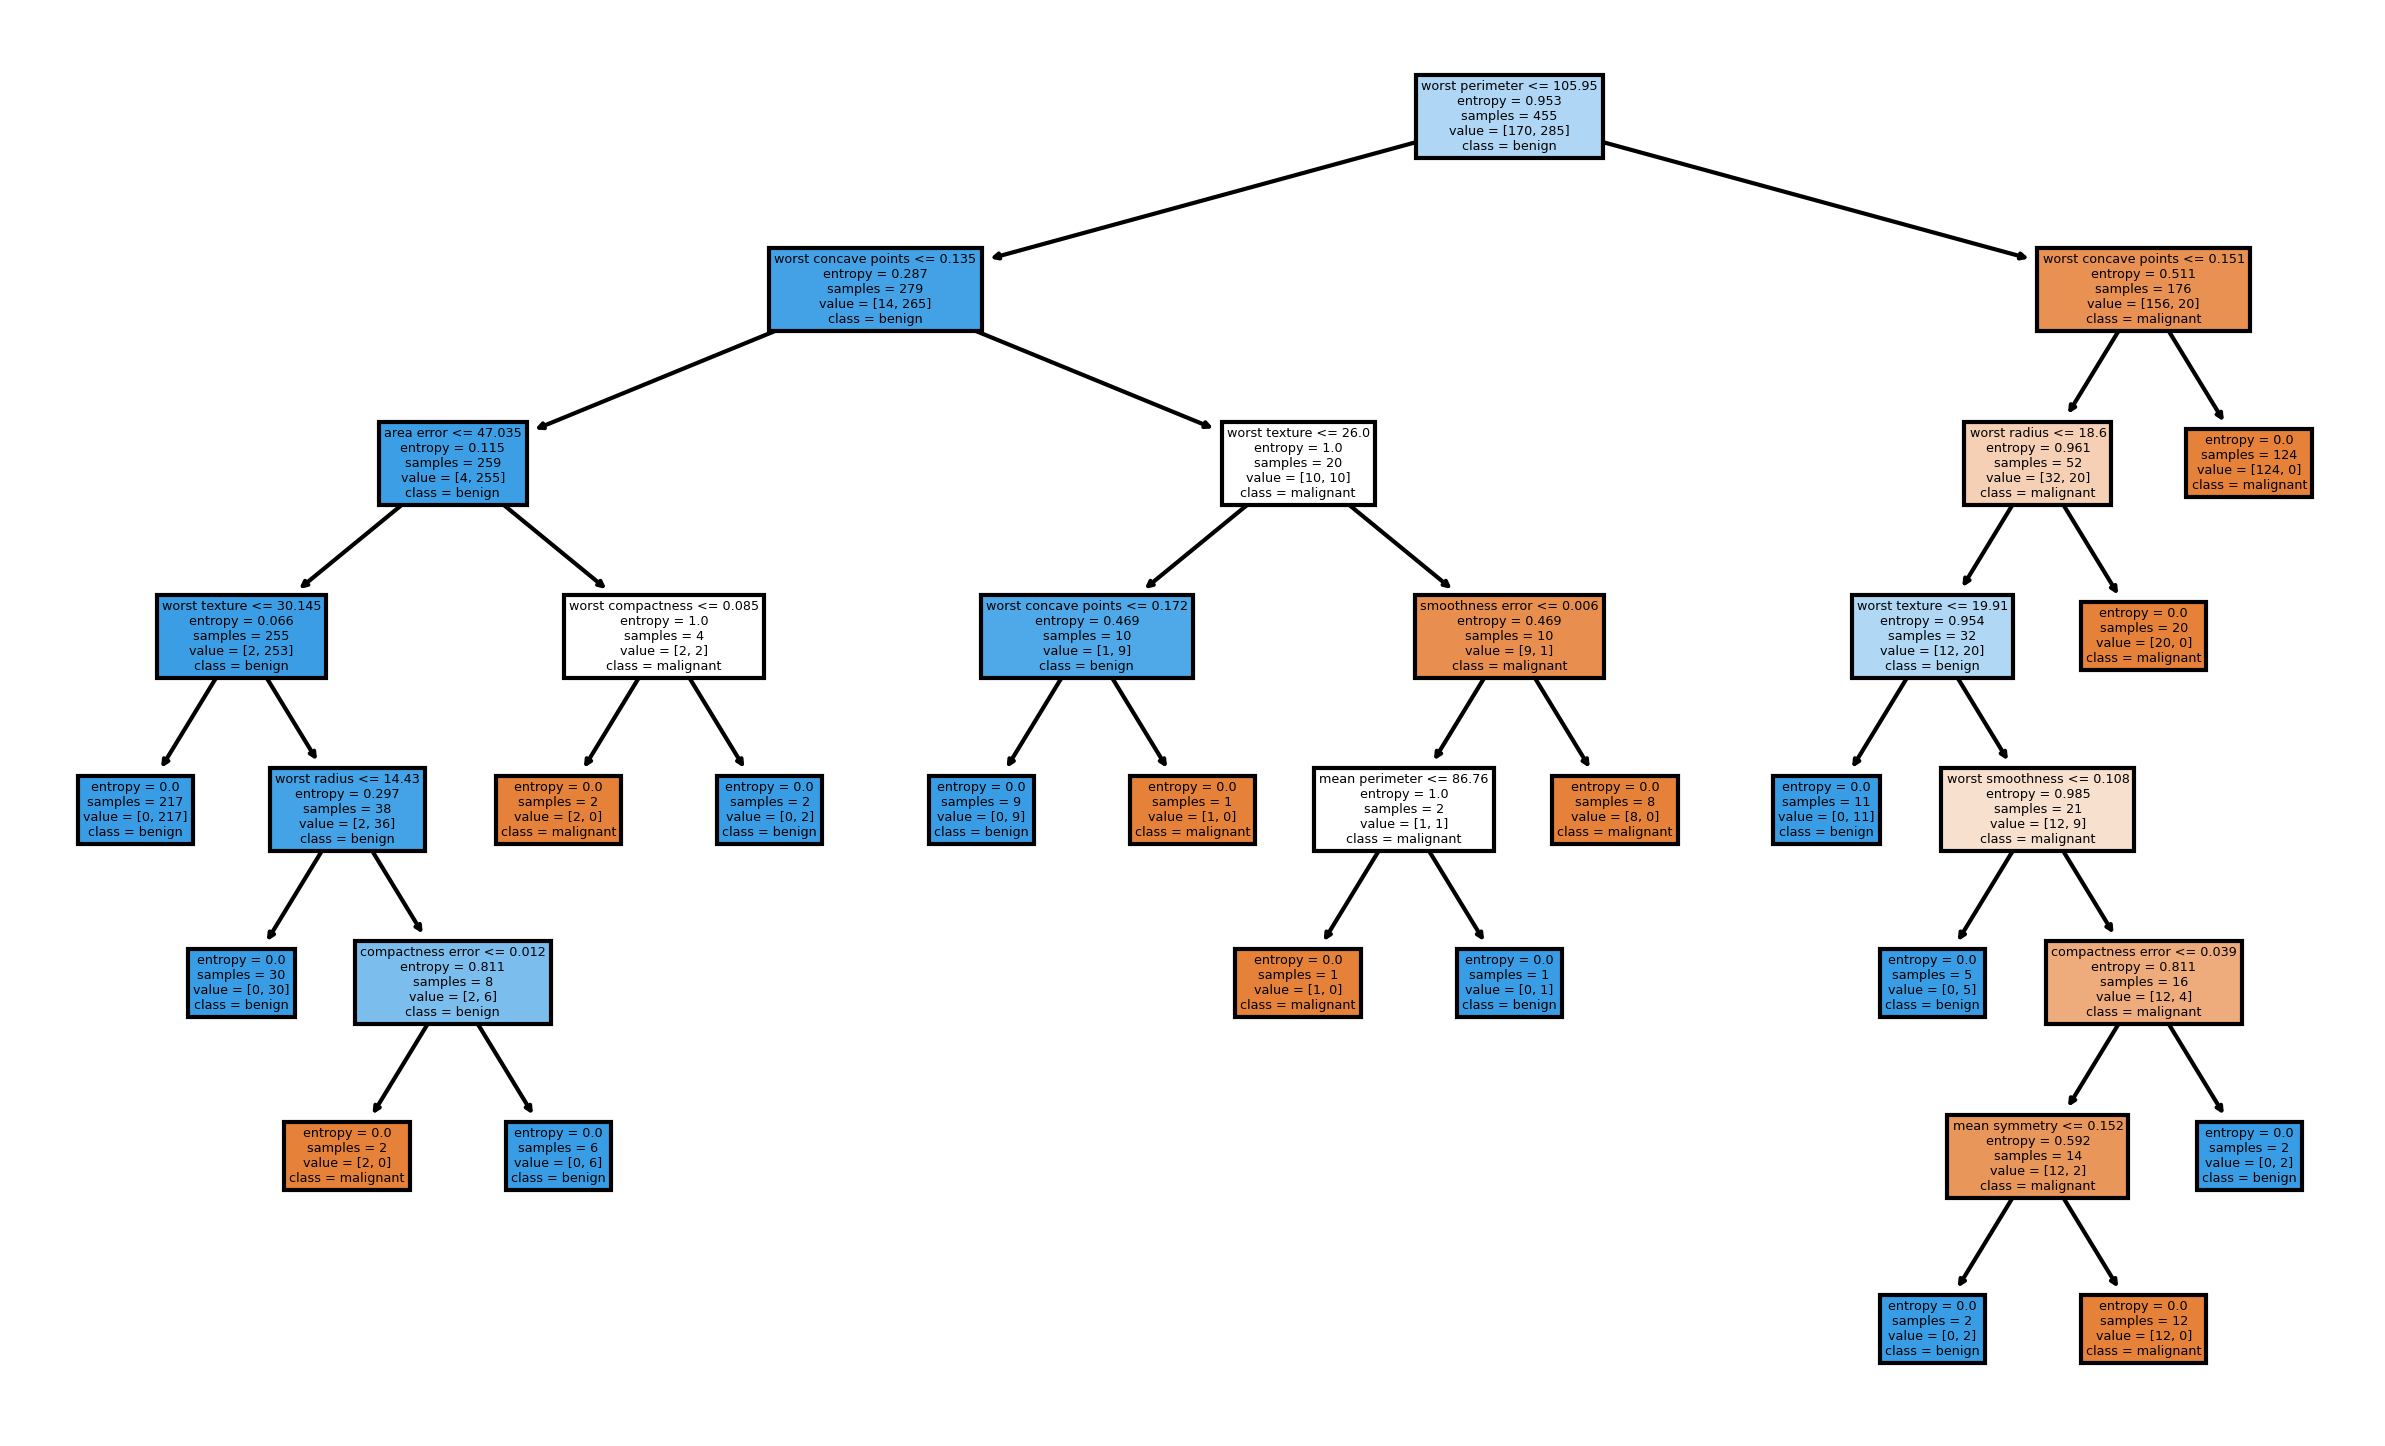

In [36]:
# plot tree
fig, axes = plt.subplots(figsize = (10,6), dpi = 300)

plot_tree(dtc7,
          feature_names = fn,
          class_names = tn,
          filled = True)

**Results using criterion**



The `dtc7` model specifies `entropy` as the `criterion` for how to split the data at each node. The `dtc7` model is less complex and more accurate than the base model. It is, in fact, the most accurrate model across all the Decision Trees tested so far.

The factors making `dtc7` less complex include:
* shallower depth than the base decision model (7 verus 8 max depth)
* fewer leaf nodes (18 versus 21)
* fewer unique features used in the decision path (11 versus 15)

***benefits of criterion adjustment***

There is a cost-benefit to using `entropy` as the criterion in a Decision Tree model compared to the `gini` criterion. The results appear to be slightly more accurate with the `entropy` criterion, but this method takes more computational power since it uses logarithms in its calculations.

For large datasets, the slight increase in accuracy versus a significant increase in computational time and resources is not likely beneficial for use in the model.

However, since this model's dataset is small, the increase in computation time is minimal. It is worth using `entropy` for this model.

### Decision Tree Results

The DecisionTreeClassifier has multiple parameters to update to help decrease the tree's complexity, even out imbalanced datasets, or provide more accurate split calculations (at the expense of training time).

Adjusting max depth created no significant improvement to the trained model, and adjusting max_leaf_nodes only provided a slight improvement. These parameters likely cause less affect on the model because the dataset is small.

Since the dataset has imbalanced feature values, balancing the class weights in the model significantly improved the mean test scores across 5 trained models, but this model also had the second lowest single trained model score.

The model that switched from `gini` criterion to the `entropy` criterion saw the highest improvement in accuracy score both with a single trained model and across 5 trained models. Although the entropy criterion is usually faster, this criterion is also a good fit for this model because the dataset is small and causes little impact on the training time of the model.

## Random Forests

Random Forests are an extension of decision trees that leverage the power of ensemble learning to improve predictive accuracy and robustness. Instead of relying on a single decision tree, Random Forests combine multiple decision trees to make more accurate and stable predictions. Let's walk through the steps of going from decision trees to Random Forests:

**Step 1: Building Individual Decision Trees**
1. **Decision Tree Construction:** Start by building multiple individual decision trees. Each tree is trained on a bootstrapped subset of the training data, meaning that each tree sees a slightly different version of the data due to random sampling with replacement.
2. **Feature Selection:** At each node of a decision tree, only a random subset of features is considered for splitting. This introduces randomness and diversity among the trees.

**Step 2: Combining Trees in a Random Forest**
1. **Predictions:** When you need to make a prediction using the Random Forest, each individual tree in the forest makes a prediction.
2. **Majority Voting (Classification) or Averaging (Regression):** In the case of classification, the class that the majority of trees predict becomes the final prediction. In the case of regression, the average of predictions from all trees is taken as the final prediction.

**Benefits of Random Forests:**
1. **Reduced Overfitting:** The ensemble nature of Random Forests helps reduce overfitting. The diversity among the trees reduces the risk of capturing noise in the data.
2. **Feature Importance:** Random Forests can provide an estimate of feature importance by tracking how much each feature contributes to improving the purity of the nodes.
3. **Handles Noisy Data:** Random Forests can handle noisy and irrelevant features more effectively than individual decision trees.
4. **Parallelization:** Training decision trees can be parallelized since they are independent of each other, which speeds up the training process.

Here are your tasks:

1. Use your training data to train a Random Forest using [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
2. Extract the feature importances from the trained model.
3. Print the feature importances from largest to smallest.

In [37]:
# Train model
rfc = RandomForestClassifier(random_state=1337)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9649122807017544

In [38]:
# view mean cross val score of 5 trained models
rfc_scores = cross_val_score(RandomForestClassifier(random_state=1337), X, y, cv=5)
rfc_scores.mean()

0.9578481602235678

**Random Forest Feature Importances**

In [39]:
# Extract feature importances from rfc model
rfc_importances = pd.DataFrame(
    {'feature': fn,
     'importance': np.round(rfc.feature_importances_,3)
     }
    ).sort_values('importance', ascending=False)

In [40]:
# Print feature importance
rfc_importances

,feature,importance
22,worst perimeter,0.157
7,mean concave points,0.135
27,worst concave points,0.123
23,worst area,0.099
20,worst radius,0.097
2,mean perimeter,0.053
13,area error,0.042
3,mean area,0.042
0,mean radius,0.038
6,mean concavity,0.026


**Previous Decision Tree Feature Importances**

In [41]:
# Extract feature importances from dtc7 model
dtc_importances = pd.DataFrame(
    {'feature': fn,
     'importance': np.round(dtc7.feature_importances_,3)
     }
    ).sort_values('importance', ascending=False)

In [42]:
# Print feature importance
dtc_importances

,feature,importance
22,worst perimeter,0.608
27,worst concave points,0.173
21,worst texture,0.060
20,worst radius,0.056
15,compactness error,0.026
13,area error,0.021
8,mean symmetry,0.019
24,worst smoothness,0.018
25,worst compactness,0.009
14,smoothness error,0.006


### Random Forest Results
The Random Forest model, with no parameter tuning, is 2% more accurate than the most accurate Decision Tree model using parameter tuning.

When looking at feature importances, the best Decision Tree model sets it's top feature, `worst perimeter`, at 60.8% importance. Also, this model only uses 11 features in its predictions. This model is likely prone to overfitting since it concentrates most of its decisions on the value of one feature.

In contrast, the Random Forest model uses 100 trees for its predictions (the default `n_estimators` value). Although the Random Forest model also has `worst perimeter` as its top feature, the importance of this feature is only 15.7%. Also, all of the features have some importance level set to them.

The Random Forest model is more accurate and less likely to overfit than the Decision Tree model.

## AdaBoost

AdaBoost, short for Adaptive Boosting, is a powerful ensemble learning technique used primarily for classification tasks. It is designed to enhance the performance of weak learners (typically shallow decision trees) by combining their predictions. AdaBoost focuses on learning from the mistakes of previous models and gives more weight to misclassified instances, allowing subsequent models to correct those mistakes.

Here's an overview of how AdaBoost works:

**Step 1: Building Weak Learners (Base Models)**
1. **Initialization:** Each training instance is initially assigned equal weights.
2. **Training Weak Learners:** A series of weak learners (e.g., shallow decision trees) are trained on the data. Each weak learner tries to minimize the weighted classification error, where the weight of an instance depends on its previous misclassifications. The first weak learner is trained on the original data.

**Step 2: Weighting Instances**
1. **Calculating Error:** The weighted classification error of each weak learner is computed as the sum of weights of misclassified instances.
2. **Updating Weights:** Instances that were misclassified by the previous weak learner are given higher weights, making them more important for subsequent models. Instances that were correctly classified are given lower weights.

**Step 3: Combining Weak Learners**
1. **Predictions and Voting:** The predictions from all weak learners are combined using weighted majority voting. Weights are assigned to each weak learner based on its performance (lower error leads to higher weight).
2. **Final Prediction:** The final prediction is made by taking a weighted majority vote of the weak learners' predictions.

**Benefits of AdaBoost:**
1. **Adaptive Learning:** AdaBoost focuses on instances that were misclassified by previous models, adapting to the complexity of the data.
2. **Improves Weak Models:** Even if individual weak learners perform only slightly better than random guessing, AdaBoost can combine them to create a strong model.
3. **Reduces Overfitting:** The iterative nature of AdaBoost allows it to focus on hard-to-classify instances and improve overall generalization.

Here are your tasks:

1. Build and train an [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) on your training data using a decision tree of max depth equal to 1 as your weak learner.
2. Evaluate your decision tree, random forest, and AdaBoost models by applying [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to the test data. Which model performs the best? Experiment by changing the hyperparameters of these models.


NOTE: The AdaBoostClassifier in scikit-learn uses a default weak learner of DecisionTreeClassifier with a max_depth of 1. The below code will explicitly assign a DecisionTreeClassifier as the estimator in the AdaBoost model.

In [43]:
# Build and train an AdaBoostClassifier on your training data.

# create base Decision Tree model to use as AdaBoost's weak learner
dtc_base = DecisionTreeClassifier(max_depth=1)

# train AdaBoost Model explicitly calling DecisionTreeClassifier
# with max_depth of 1 as the estimator (weak learner for the model)
abc = AdaBoostClassifier(estimator=dtc_base,
                         random_state=27)
abc.fit(X_train, y_train)
abc.score(X_test, y_test)

0.9649122807017544

In [44]:
# get mean score of 5 trained models
abc_scores = cross_val_score(AdaBoostClassifier(estimator=dtc_base, random_state=27), X, y, cv=5)
abc_scores.mean()

0.9701133364384411

The below code will now create an AdaBoost model which implicitly uses a DecisionTreeClassifier with max_depth of 1 as the weak learner by using the default settings in AdaBoostClassifier.

The scores from the AdaBoost model above should match the scores of the AdaBoost model below.

In [45]:
# train AdaBoost Model with scikit-learn's default weak learner
abc = AdaBoostClassifier(random_state=27)
abc.fit(X_train, y_train)
abc.score(X_test, y_test)

0.9649122807017544

In [46]:
# get mean score of 5 trained models
abc_scores = cross_val_score(AdaBoostClassifier(random_state=27), X, y, cv=5)
abc_scores.mean()

0.9701133364384411

### AdaBoost Results
The mean cross validation score of a basic AdaBoost model is almost 3.5% more accurate than the best Decision Tree model, and over 1% more accurate than the basic Random Forest model.

By adjusting parameters, the AdaBoost and Random Forest models are likely even more accurate than a Decision Tree model with this dataset.

## Evaluate Models

In this section, each model type (Decision Tree, Random Forest, and AdaBoost) will be tested using automated hyperparameter tuning. Through scikit-learn's GridSearchCV, several parameters for each model will be tested at once to determine what combination of adjusted parameters will increase the accuracy of the models.

### Test New Models Using Hyperparameter Tuning

**Decision Tree Hyperparameter Testing**

Parameters included for tuning are the same used in the manual Decision Tree training above. The below tuning also incorporates a few more values for the max_leaf_nodes than was tested previously.

In [47]:
# create dictionary for parameters to tune
dt_param_grid = {
    'max_leaf_nodes': [None, 15, 16, 21, 22, 30],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy']
}

In [48]:
# perform hyperparameter testing on 3 models
from sklearn.model_selection import GridSearchCV

dtc_grid = GridSearchCV(dtc, dt_param_grid, cv=3, n_jobs=-1)

In [49]:
# fit and evaluate parameters
dtc_grid.fit(X_train, y_train)
dtc_grid.best_params_

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_leaf_nodes': None}

Below are the scores of the best Decision Tree model per GridSearchCV.

In [50]:
# view scores from models trained with GridSearchCV

# create dataframe holding grid results
dtc_df = pd.DataFrame(dtc_grid.cv_results_)

# view score from first trained model using best_params
dtc_hp_score = dtc_df.split0_test_score[dtc_df.params == {'class_weight': 'balanced', 'criterion': 'entropy', 'max_leaf_nodes': None}].values[0]
print(f'first trained model score: \n{dtc_hp_score}')

first trained model score: 
0.9078947368421053


In [51]:
# view mean score from 3 models trained using best_params
dtc_mean_score = dtc_df.mean_test_score[dtc_df.params == {'class_weight': 'balanced', 'criterion': 'entropy', 'max_leaf_nodes': None}].values[0]
print(f'mean score of 3 trained models: \n{dtc_mean_score}')

mean score of 3 trained models: 
0.9318868362960381


***Decision Tree Results***

To create the most accurate Decision Tree per GridSearchCV testing, two parameters should be adjusted.

Parameters to adjust:
* class_weight = balanced
* criterion = entropy

Of note, these are the two parameters that were adjusted in the last two Decision Tree models tested when manaully adjusting parameter settings. Their mean cross validation scores were the highest two scores among all of the manually tested models.

**Random Forest Hyperparameter Tuning**

The parameters tested below include `n_estimators`, `max_features`, `class_weight`, and `criterion`. All of the below parameters besides `n_estimators` were used in training the Decision Tree models previously.

***n_estimators***

The `n_estimators` parameter sets how many trees will be used in the random forest. A lower number creates a faster model, but it may be less accurate.

To help ensure the best number of trees are used in the model, the below testing will try various values of trees -- going from 1 to 200, increasing the number by increments of 10.

***max_features***

The number of max_features chosen to test include values close to 50% and 75% of the total number of features. The list of values tested also includes `None`, so that all features will be in one of the models tested.

***class_weight***

All available options for the class_weight parameter are included in the testing.

***criterion***

Both the default `gini` criterion and `entropy` criterion will be tested.

***max_samples***

Although the max_samples parameter can be useful for parameter tuning, the sample size of this dataset is small. Reducing the sample size further by incorporating max_samples into the test will likely not benefit the model's accuracy significantly.

Also, several parameters with multiple values are being tested below. Leaving out max_samples will speed up the testing time.

Since this model uses a large number of n_estimators to test, testing will be done in batches, splitting up the values used for the n_estimators.

The final parameter testing will occur on the best parameters from each round of testing.

In [52]:
# First Round of Hyper Parameter Tuning

# create dictionary of parameters and values to test
rf1_param_grid = {
    'n_estimators': [1, 10, 20, 30, 40, 50, 60, 80],
    'max_features': [None, 16, 17, 23, 24],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'criterion': ['gini', 'entropy']
}

In [53]:
# perform hyperparameter testing on 3 models
rfc1_grid = GridSearchCV(rfc, rf1_param_grid, cv=3, n_jobs=-1)

In [54]:
# fit and evaluate parameters
rfc1_grid.fit(X_train, y_train)
rfc1_grid.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_features': None,
 'n_estimators': 20}

In [55]:
# Second Round of Hyperparameter Tuning

# create dictionary of parameters and values to test
rf2_param_grid = {
    'n_estimators': [90, 100, 110, 120, 130],
    'max_features': [None, 16, 17, 23, 24],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'criterion': ['gini', 'entropy']
}

In [56]:
# perform hyperparameter testing on 3 models
rfc2_grid = GridSearchCV(rfc, rf2_param_grid, cv=3, n_jobs=-1)

In [57]:
# fit and evaluate parameters
rfc2_grid.fit(X_train, y_train)
rfc2_grid.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 17,
 'n_estimators': 90}

In [58]:
# Third Round of Hyperparameter Tuning

# create dictionary of parameters and values to test
rf3_param_grid = {
    'n_estimators': [140, 150, 160, 170],
    'max_features': [None, 16, 17, 23, 24],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'criterion': ['gini', 'entropy']
}

In [59]:
# perform hyperparameter testing on 3 models
rfc3_grid = GridSearchCV(rfc, rf3_param_grid, cv=3, n_jobs=-1)

In [60]:
# fit and evaluate parameters
rfc3_grid.fit(X_train, y_train)
rfc3_grid.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_features': 16,
 'n_estimators': 160}

In [61]:
# Fourth Round of Hyperparameter Tuning

# create dictionary of parameters and values to test
rf4_param_grid = {
    'n_estimators': [180, 190, 200],
    'max_features': [None, 16, 17, 23, 24],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'criterion': ['gini', 'entropy']
}

In [62]:
# perform hyperparameter testing on 3 models
rfc4_grid = GridSearchCV(rfc, rf4_param_grid, cv=3, n_jobs=-1)

In [63]:
# fit and evaluate parameters
rfc4_grid.fit(X_train, y_train)
rfc4_grid.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_features': 16,
 'n_estimators': 200}

In [64]:
# Final Round of Hyperparameter Tuning

# create dictionary with best_params_ from Rounds 1 through 4
rf5_param_grid = {
    'n_estimators': [20, 90, 160, 200],
    'max_features': [None, 16, 17],
    'class_weight': [None, 'balanced_subsample'],
    'criterion': ['gini', 'entropy']
}

In [65]:
# perform hyperparameter testing on 3 models
rfc5_grid = GridSearchCV(rfc, rf5_param_grid, cv=3, n_jobs=-1)

In [66]:
# fit and evaluate parameters
rfc5_grid.fit(X_train, y_train)
rfc5_grid.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_features': None,
 'n_estimators': 20}

Below are the scores for the best Random Forest model as computed by GridSearchCV.

In [67]:
# view scores from models trained with GridSearchCV

# create dataframe holding grid results
rfc_df = pd.DataFrame(rfc5_grid.cv_results_)

# view score from first trained model with best_params
rfc_hp_score = rfc_df.split0_test_score[rfc_df.params == {'class_weight': None, 'criterion': 'gini', 'max_features': None, 'n_estimators': 20}].values[0]
print(f'first trained model score: \n{rfc_hp_score}')

first trained model score: 
0.9605263157894737


In [68]:
# view mean score from 3 models trained with best_params
rfc_mean_score = rfc_df.mean_test_score[rfc_df.params == {'class_weight': None, 'criterion': 'gini', 'max_features': None, 'n_estimators': 20}].values[0]
print(f'mean score of 3 trained models: \n{rfc_mean_score}')

mean score of 3 trained models: 
0.960439177413733


***Random Forest Results***

Although adjusting multiple parameters can increase the accuracy of a model, making one simple parameter change can make the most improvement in a model.

Although reducing the max features and using the entropy criterion along with adjusting the n_estimators did make reasonably accurate models, simply adjusting the number of n_estimators created the most accurate Random Forest model per GridSearchCV.

The best Random Forest model per GridSearchCV is also less complex than the base model since it uses fewer trees.

**AdaBoost Hyperparameter Tuning**

The AdaBoostClassification in scikit-learn only has a few parameters to tune. The following parameters will be tuned: `n_estimators`, `learning_rate`, and `algorithm`. These parameters are all possible parameters that can be tuned, aside from the estimator. The estimator will remain as the default DecisionTreeClassifier.

***n_estimators***

As in the Random Forest tesing, various values for the n_estimators will be used to find the best number of trees to use in the model. The values range from 1 to 200, increasing by an increment of 10.

***learning_rate***

The learning_rate parameter helps determine how much weight each new tree adds to the total model's predictions. This number is usually an inverse to the number n_estimators. Meaning that the more trees you use in the model, the less weight each new tree should add to the overall model, and vice versa.

The default learning rate is 1.0, and a few values will be tested both above and below this value.


***algorithm***

The two boosting algorithms available in AdaBoostClassifier are the default `SAMME.R` calculation as well as the `SAMME` algorithm.

The `SAMME.R` boosting algorithm typically provides models with lower test errors while going through fewer boosting cycles, which is why it is the default algorithm. Interesting to note, however, is that the `SAMME.R` algorithm will be removed from AdaBoost in version 1.6 of scikit-learn.

In [69]:
# First Round of Hyper Parameter Tuning

# create dictionary for parameters to test
ab1_param_grid = {
    'n_estimators': [1, 10, 20, 30, 40, 50, 60, 70, 80],
    'learning_rate': [.001, .1, .5, 1.0, 1.5, 2.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [70]:
# perform hyperparameter testing on 3 models
abc1_grid = GridSearchCV(abc, ab1_param_grid, cv=3, n_jobs=-1)

In [71]:
# fit and evaluate parameters
abc1_grid.fit(X_train, y_train)
abc1_grid.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 50}

In [72]:
# Second Round of Hyper Parameter Tuning

# create dictionary for parameters to test
ab2_param_grid = {
    'n_estimators': [90, 100, 110, 120, 130],
    'learning_rate': [.001, .1, .5, 1.0, 1.5, 2.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [73]:
# perform hyperparameter testing on 3 models
abc2_grid = GridSearchCV(abc, ab2_param_grid, cv=3, n_jobs=-1)

In [74]:
# fit and evaluate parameters
abc2_grid.fit(X_train, y_train)
abc2_grid.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.5, 'n_estimators': 90}

In [75]:
# Third Round of Hyper Parameter Tuning

# create dictionary for parameters to test
ab3_param_grid = {
    'n_estimators': [140, 150, 160, 170],
    'learning_rate': [.001, .1, .5, 1.0, 1.5, 2.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [76]:
# perform hyperparameter testing on 3 models
abc3_grid = GridSearchCV(abc, ab3_param_grid, cv=3, n_jobs=-1)

In [77]:
# fit and evaluate parameters
abc3_grid.fit(X_train, y_train)
abc3_grid.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 150}

In [78]:
# Fourth Round of Hyper Parameter Tuning

# create dictionary for parameters to test
ab4_param_grid = {
    'n_estimators': [180, 190, 200],
    'learning_rate': [.001, .1, .5, 1.0, 1.5, 2.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [79]:
# perform hyperparameter testing on 3 models
abc4_grid = GridSearchCV(abc, ab4_param_grid, cv=3, n_jobs=-1)

In [80]:
# fit and evaluate parameters
abc4_grid.fit(X_train, y_train)
abc4_grid.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 200}

In [81]:
# Final Round of Hyper Parameter Tuning

# create dictionary with best_params_ from Round 1 & Round 2 GridSearches
ab5_param_grid = {
    'n_estimators': [50, 90, 150, 200],
    'learning_rate': [0.5, 1.0, 1.5],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [82]:
# perform hyperparameter testing on 3 models
abc5_grid = GridSearchCV(abc, ab5_param_grid, cv=3, n_jobs=-1)

In [83]:
# fit and evaluate parameters
abc5_grid.fit(X_train, y_train)
abc5_grid.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 200}

Below are the scores for the best AdaBoost model as computed by GridSearchCV.

In [84]:
# view scores from models trained with abc_grid parameters

# create dataframe holding abc_grid results
abc_df = pd.DataFrame(abc5_grid.cv_results_)

# view score from first trained model with best_params
abc_hp_score = abc_df.split0_test_score[abc_df.params == {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 200}].values[0]
print(f'first trained model score: \n{abc_hp_score}')

first trained model score: 
0.9671052631578947


In [85]:
# view mean score from 3 models trained with best_params
abc_mean_score = abc_df.mean_test_score[abc_df.params == {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 200}].values[0]
print(f'mean score of 3 trained models: \n{abc_mean_score}')

mean score of 3 trained models: 
0.9647960962007668


***AdaBoost Results***


The best AdaBoost model per GridSearchCV adjusts several parameters:
* n_estimators = 200
* learning_rate = 0.5
* algorithm = SAMME

As noted previously, the learning_rate is usually an inverse number to the number of trees used in the model. When looking at each round of testing, this effect can be seen clearly between round 2 and rounds 3 and 4.
  
When the number of estimators was below 100, the learning rate was between 1.0 and 1.5. When the number of estimators was above 100, the learning rate was 0.5.

The algorithm also changed once the number of estimators increased. When the number of estimators went above 100, the algorithm switched from SAMME.R to SAMME.

### Calculate Model Scores

Accuracy scores based off y_predictions of the model will be hard to calculate using the GridSearchCV models tested.

In order to create accuracy scores based off y_predictions, the below code will manually create the best Decision Tree, Random Forest, and AdaBoost model per the GridSearchCV calculations.

In [90]:
# create best models manually

# the best Decision Tree model
dtc8 = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', random_state=42)
dtc8.fit(X_train, y_train)

# the best Random Forest model
rfc2 = RandomForestClassifier(n_estimators=20, random_state=1337)
rfc2.fit(X_train, y_train)

# the best AdaBoost model
abc2 = AdaBoostClassifier(n_estimators=200, learning_rate = 0.5, algorithm = 'SAMME', random_state=27)
abc2.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=200,
                   random_state=27)

In [91]:
# calculate accuracy scores

# accuracy score for Decision Tree model
dtc_predict = dtc8.predict(X_test)
dtc_acc_score = accuracy_score(y_test, dtc_predict)

# accuracy score for Random Forest model
rfc_predict = rfc2.predict(X_test)
rfc_acc_score = accuracy_score(y_test, rfc_predict)

# accuracy score for AdaBoost Decision Tree model
abc_predict = abc2.predict(X_test)
abc_acc_score = accuracy_score(y_test, abc_predict)

Model scores from GridSearchCV were saved in variables. The score comes from the first trained model of each model type, found in the `split0_test_score` column of the GridSearchCV results.

These scores are NOT an accuracy score calculated from y_predictions of the models.

Variable names:
* `dtc_hp_score`: Decision Tree, single model score
* `rfc_hp_score`: Random Forest, single model score
* `abc_hp_score`: AdaBoost, first model score

### View Accuracy Scores

**View accuracy scores from GridSearchCV and manually created models**

The below code creates a dataframe holding the accuracy scores of:
* models created with GridSearchCV, set to `best_params_`
* models created manually using `best_params_` from GridSearchCV

In [88]:
score_dict = {
    'MODEL': ['Decision Tree', 'Random Forest', 'AdaBoost'],
    'GridSearchCV_Score': [dtc_hp_score, rfc_hp_score, abc_hp_score],
    'Manually_Tuned_Score': [dtc_acc_score, rfc_acc_score, abc_acc_score]
}
scores_df = pd.DataFrame(score_dict)

scores_df

,MODEL,GridSearchCV_Score,Manually_Tuned_Score
0,Decision Tree,0.907895,0.947368
1,Random Forest,0.960526,0.973684
2,AdaBoost,0.967105,0.982456


### Accuracy Score Results

**Accuracy Scores Across Model Types**

Across both sets of scores (scores from GridSearchCV and scores from manually created models), it is clear that the Decision Tree model is the least accurate model. The improvement in accuracy ranges between 2.6% and 5.9% when comparing Random Forest and AdaBoost accuracy scores against the Decision Tree models.

When comparing the Random Forest models to the AdaBoost models, the AdaBoost models are slightly better than the Random Forest Models. However, the difference in accuracy is less than 1%.






**Accuracy Scores: Hyperparameter Tuning vs. Single Parameter Tuning**

Using hyperparameter tuning provides a noticable increase in accuracy to each model's score. The Decision Tree model increased its accuracy by over 2.5% with hyperparameter tuning.

The AdaBoost model had an increased score by over 1.75% with hyperparameter tuning.

The least improvement to accuracy using hyperparameter tuning was to the Random Forest model. This model's score only increased by 0.88%.

However, this lower increase in accuracy may be due to only one parameter being adjusted in the Random Forest Model. In comparison, the Decision Tree model tuned 2 parameters, and the AdaBoost model tuned 3 parameters.

# Summary

The AdaBoost and Random Tree models are more accurate than the Decision Tree models per the testing done in this notebook. Also, the AdaBoost models are slightly more accurate than the Random Forest models.

All models performed better after testing out multiple parameter settings and using the best parameters found in testing.

Since the AdaBoost algorithm in scikit-learn has fewer parameters, it was faster to perform hyperparmeter testing on the AdaBoost models as compared to the Random Forest models.

Overall, it is key to understand what each parameter is used for in the models and how they should be adjusted according to the type and amount of data in the dataset. This knowledge will aid in choosing the right parameters to test and what values to use for testing the parameter options.